<a href="https://colab.research.google.com/github/paulmachau/K-means-clustering-/blob/main/Phoenix_KE_Analytics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#loading the dataset
df = pd.read_csv('/content/Synthetic Agent Data.csv')
df.head()

,Unnamed: 0,Agent 0,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,...,Agent 1190,Agent 1191,Agent 1192,Agent 1193,Agent 1194,Agent 1195,Agent 1196,Agent 1197,Agent 1198,Agent 1199
0,0,1,2,1,0,1,1,0,0,0,...,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,1,9,10,8,2,15,7,0,2,2,...,0.0,9.0,8.0,0.0,14.0,0.0,1.0,0.0,7.0,1.0
2,2,9,7,11,3,10,7,0,1,3,...,3.0,9.0,10.0,0.0,9.0,0.0,2.0,1.0,12.0,0.0
3,3,11,14,13,0,8,9,0,0,3,...,1.0,14.0,11.0,1.0,7.0,2.0,3.0,1.0,10.0,2.0
4,4,11,13,7,1,7,8,1,0,4,...,2.0,14.0,8.0,0.0,7.0,1.0,2.0,1.0,15.0,1.0


In [3]:
#defining the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 1201 entries, Unnamed: 0 to Agent 1199
dtypes: float64(917), int64(283), object(1)
memory usage: 797.7+ KB


In [4]:
# checking for missing values

df.isnull().sum()


Unnamed: 0    0
Agent 0       0
Agent 1       0
Agent 2       0
Agent 3       0
             ..
Agent 1195    1
Agent 1196    1
Agent 1197    1
Agent 1198    1
Agent 1199    1
Length: 1201, dtype: int64

In [5]:
#removing missing values

df = df.dropna()


In [6]:
#droping the first column

df = df.iloc[: , 1:]
df.head()


,Agent 0,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,Agent 9,...,Agent 1190,Agent 1191,Agent 1192,Agent 1193,Agent 1194,Agent 1195,Agent 1196,Agent 1197,Agent 1198,Agent 1199
0,1,2,1,0,1,1,0,0,0,2,...,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,9,10,8,2,15,7,0,2,2,11,...,0.0,9.0,8.0,0.0,14.0,0.0,1.0,0.0,7.0,1.0
2,9,7,11,3,10,7,0,1,3,11,...,3.0,9.0,10.0,0.0,9.0,0.0,2.0,1.0,12.0,0.0
3,11,14,13,0,8,9,0,0,3,14,...,1.0,14.0,11.0,1.0,7.0,2.0,3.0,1.0,10.0,2.0
4,11,13,7,1,7,8,1,0,4,13,...,2.0,14.0,8.0,0.0,7.0,1.0,2.0,1.0,15.0,1.0


In [7]:
# Transpose the dataframe so that each row represents an agent
df_transposed = df.transpose()

# Rename columns to represent days
df_transposed.columns = [f'Day_{i}' for i in range(df_transposed.shape[1])]


In [8]:
#print the new data set

df_transposed.head()


,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,...,Day_74,Day_75,Day_76,Day_77,Day_78,Day_79,Day_80,Day_81,Day_82,Day_83
Agent 0,1.0,9.0,9.0,11.0,11.0,8.0,1.0,2.0,12.0,7.0,...,7.0,7.0,1.0,2.0,7.0,8.0,7.0,11.0,9.0,2.0
Agent 1,2.0,10.0,7.0,14.0,13.0,11.0,2.0,2.0,9.0,7.0,...,14.0,8.0,1.0,2.0,7.0,8.0,11.0,7.0,9.0,2.0
Agent 2,1.0,8.0,11.0,13.0,7.0,14.0,2.0,2.0,15.0,13.0,...,7.0,9.0,2.0,1.0,9.0,7.0,7.0,9.0,11.0,2.0
Agent 3,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Agent 4,1.0,15.0,10.0,8.0,7.0,12.0,2.0,2.0,8.0,8.0,...,7.0,10.0,2.0,2.0,9.0,10.0,7.0,13.0,7.0,2.0


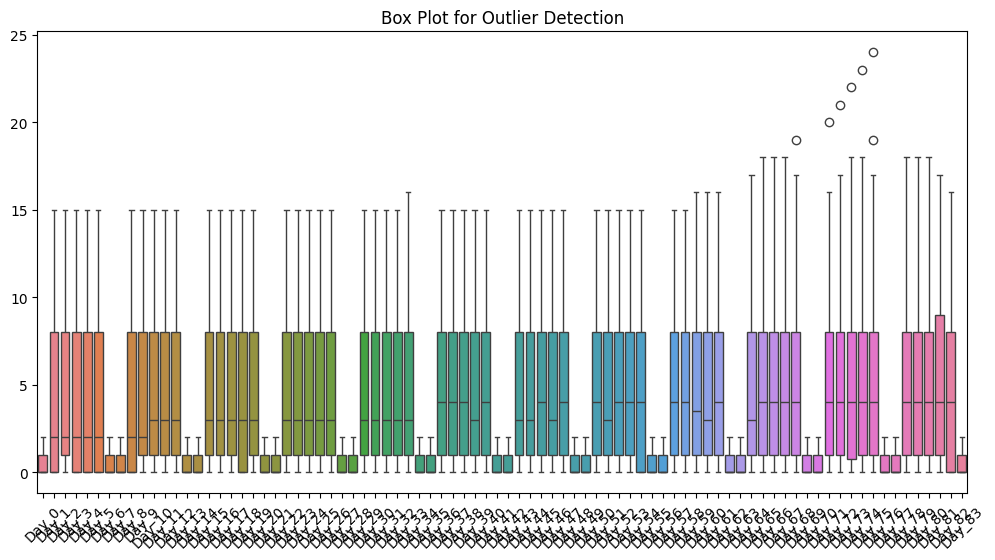

In [8]:
# prompt: checking for outliers and plotting

# Checking for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transposed)
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


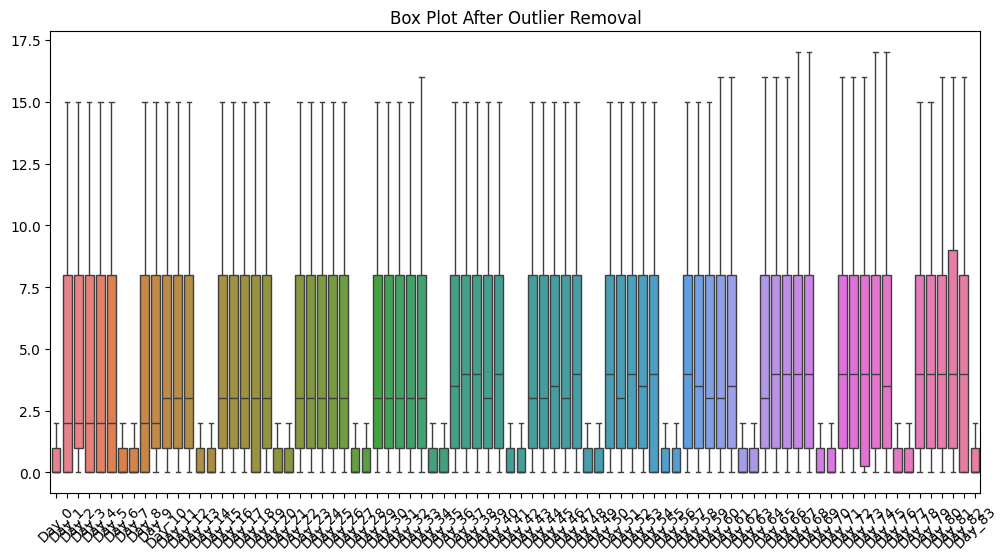

In [9]:
# Removing outliers using IQR method
Q1 = df_transposed.quantile(0.25)
Q3 = df_transposed.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_transposed[~((df_transposed < (Q1 - 1.5 * IQR)) | (df_transposed > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plotting box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers)
plt.title('Box Plot After Outlier Removal')
plt.xticks(rotation=45)
plt.show()


In [11]:

# Calculate mean, median, max, and min for each agent
agent_stats = pd.DataFrame()
agent_stats['Mean'] = df_transposed.mean(axis=1)
agent_stats['Median'] = df_transposed.median(axis=1)
agent_stats['Max'] = df_transposed.max(axis=1)
agent_stats['Min'] = df_transposed.min(axis=1)

print(agent_stats)


                Mean  Median   Max  Min
Agent 0     6.940476     7.0  14.0  1.0
Agent 1     6.702381     7.0  15.0  1.0
Agent 2     7.000000     7.5  15.0  1.0
Agent 3     0.535714     0.0   3.0  0.0
Agent 4     7.297619     8.0  15.0  1.0
...              ...     ...   ...  ...
Agent 1195  0.309524     0.0   2.0  0.0
Agent 1196  2.083333     2.0   6.0  0.0
Agent 1197  1.714286     1.0   8.0  0.0
Agent 1198  7.285714     7.0  15.0  1.0
Agent 1199  0.595238     0.0   3.0  0.0

[1200 rows x 4 columns]


In [12]:
# Calculate overall statistics
overall_stats = pd.DataFrame()
overall_stats['Mean'] = [df_transposed.values.mean()]
overall_stats['Median'] = [np.median(df_transposed.values)]
overall_stats['Max'] = [df_transposed.values.max()]
overall_stats['Min'] = [df_transposed.values.min()]

# Display the overall statistics
print("\nOverall statistics:\n", overall_stats)



Overall statistics:
        Mean  Median   Max  Min
0  3.542857     1.0  24.0  0.0


**Inference**

* Overall Mean: The average number of tasks completed across all agents and all days is approximately 3.54 tasks per day.
* Overall Median: The median number of tasks completed is 5, indicating that on most days, agents completed around 1 tasks.

* Overall Max: The maximum number of tasks completed in a single day by any agent is 24.
* Overall Min: The minimum number of tasks completed in a single day is 0, indicating some days with no task completions.

From the summury statistics it shows a high variation between the max and Min task done in a day  which has resulted in a low frequency of number of tasks completed in a day indicated by the median



In [13]:
#the standard deviation of their number of tasks completed

agent_stats['Std Dev'] = df_transposed.std(axis=1)
print(agent_stats)


                Mean  Median   Max  Min   Std Dev
Agent 0     6.940476     7.0  14.0  1.0  3.816108
Agent 1     6.702381     7.0  15.0  1.0  3.867628
Agent 2     7.000000     7.5  15.0  1.0  4.032996
Agent 3     0.535714     0.0   3.0  0.0  0.870486
Agent 4     7.297619     8.0  15.0  1.0  4.236331
...              ...     ...   ...  ...       ...
Agent 1195  0.309524     0.0   2.0  0.0  0.559177
Agent 1196  2.083333     2.0   6.0  0.0  1.716036
Agent 1197  1.714286     1.0   8.0  0.0  1.923673
Agent 1198  7.285714     7.0  15.0  1.0  4.249937
Agent 1199  0.595238     0.0   3.0  0.0  0.879746

[1200 rows x 5 columns]


In [14]:
# prompt: the standard deviation for overall agents combined

overall_std = df_transposed.values.std()
print("\nOverall standard deviation:", overall_std)



Overall standard deviation: 4.230781543835055


ValueError: num must be an integer with 1 <= num <= 25, not 26

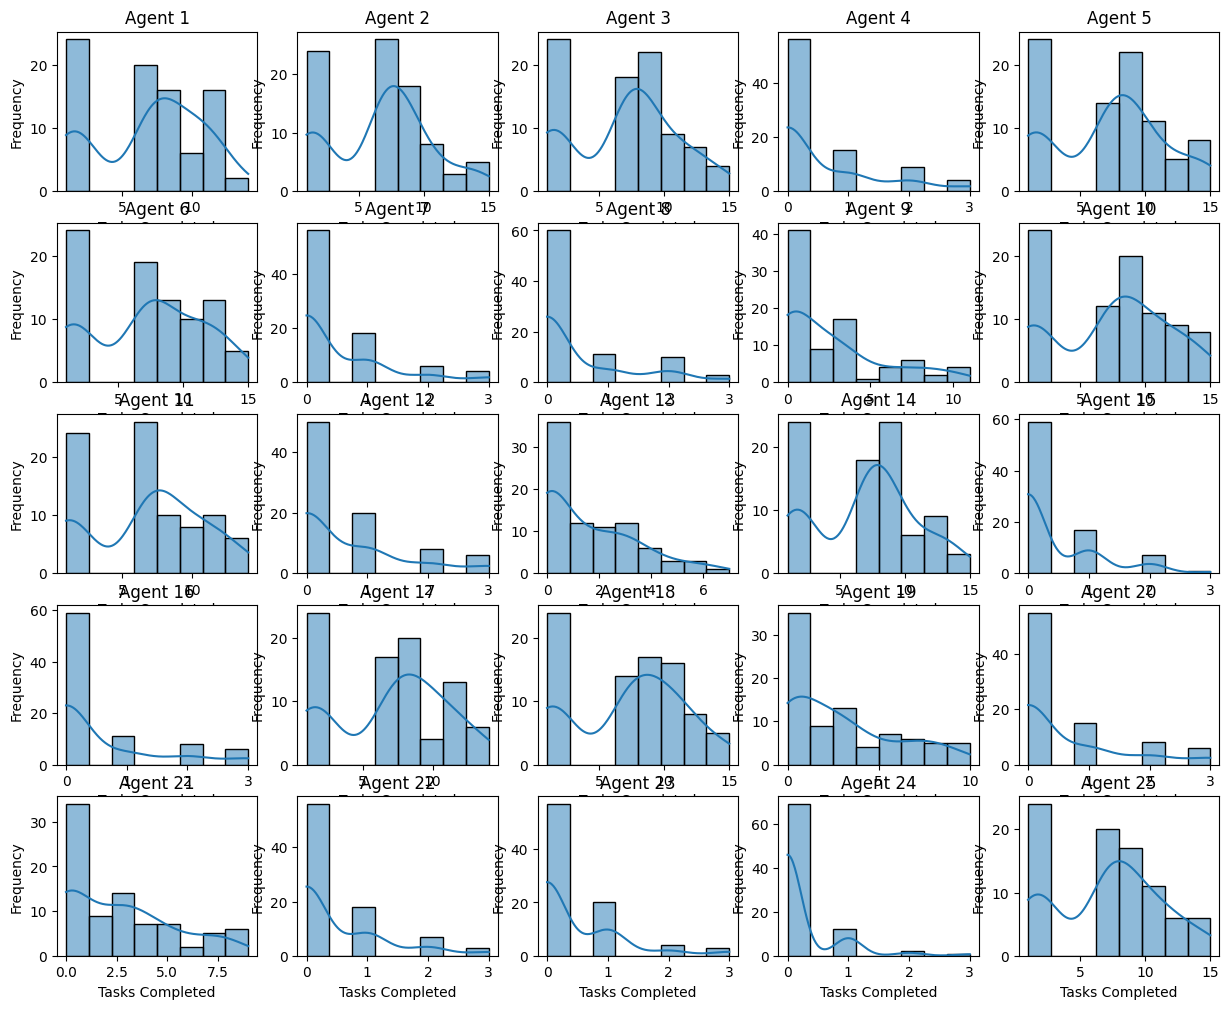

In [21]:
# prompt: checking for distribution of data

# Checking distribution of data for each agent
plt.figure(figsize=(15, 12))
for i in range(df_transposed.shape[0]):
  plt.subplot(5, 5, i+1)
  sns.histplot(df_transposed.iloc[i], kde=True)
  plt.title(f'Agent {i+1}')
  plt.xlabel('Tasks Completed')
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 25, not 26

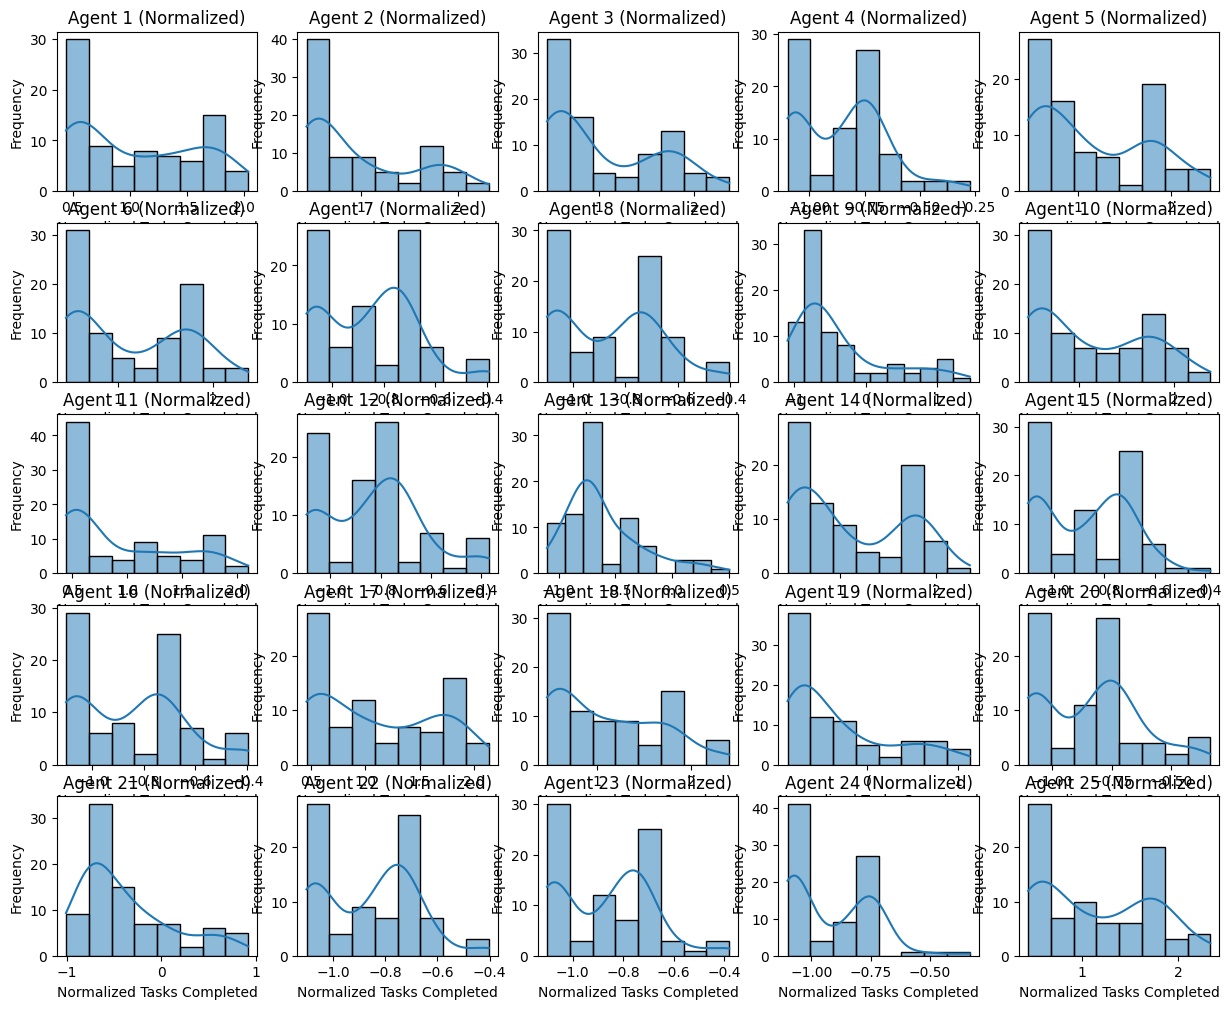

In [23]:
# prompt: Normalizing the dataset and plotting graphs

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_transposed)
df_normalized = pd.DataFrame(df_normalized, columns=df_transposed.columns)

# Checking distribution of normalized data for each agent
plt.figure(figsize=(15, 12))
for i in range(df_normalized.shape[0]):
  plt.subplot(5, 5, i+1)
  sns.histplot(df_normalized.iloc[i], kde=True)
  plt.title(f'Agent {i+1} (Normalized)')
  plt.xlabel('Normalized Tasks Completed')
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##Agent Persona

In [24]:
# Prepare the data for clustering
agent_stats = pd.DataFrame({
    'Mean': df_transposed.mean(axis=1),
    'Median': df_transposed.median(axis=1),
    'Max': df_transposed.max(axis=1),
    'Min': df_transposed.min(axis=1),
    'Std Dev': df_transposed.std(axis=1)
})

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
agent_stats_scaled = scaler.fit_transform(agent_stats)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

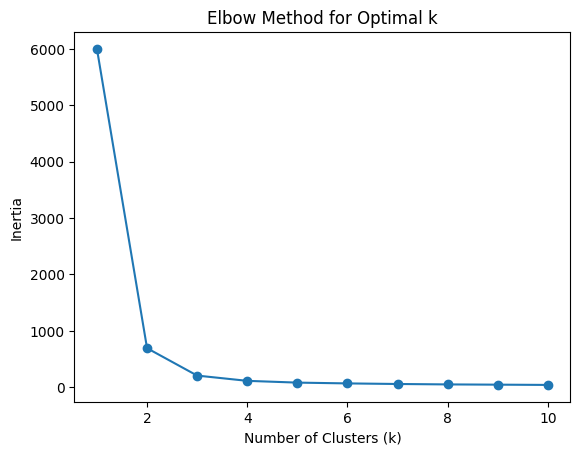

In [25]:
# prompt: # Determine the optimal number of clusters using the elbow method

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(agent_stats_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             Mean    Median        Max       Min   Std Dev
Cluster                                                   
0        0.522093  0.081594   3.091082  0.000000  0.816076
1        7.149839  7.481013  14.966245  0.993671  4.167907
2        2.951065  2.650754   9.376884  0.000000  2.769161


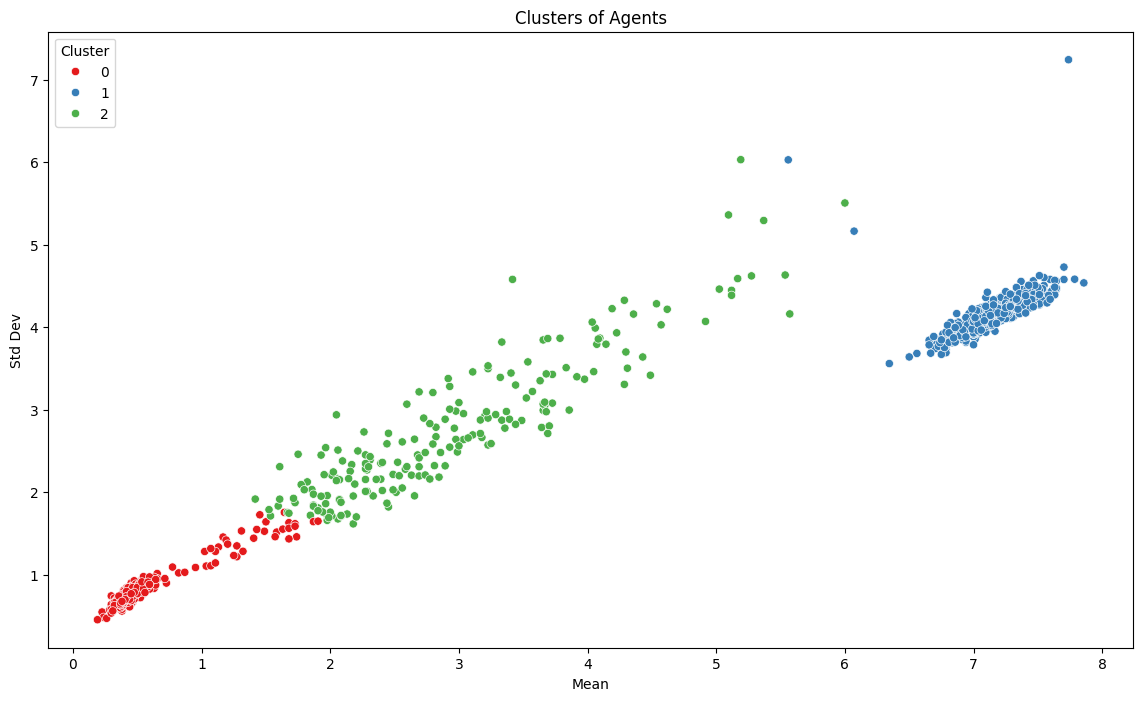

In [26]:
# Assuming from the elbow plot that the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(agent_stats_scaled)
agent_stats['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_means = agent_stats.groupby('Cluster').mean()
print(cluster_means)

# Plotting the clusters for visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Mean', y='Std Dev', hue='Cluster', data=agent_stats, palette='Set1')
plt.title('Clusters of Agents')
plt.show()


Silhouette Score for 3 clusters: 0.8288481793826251


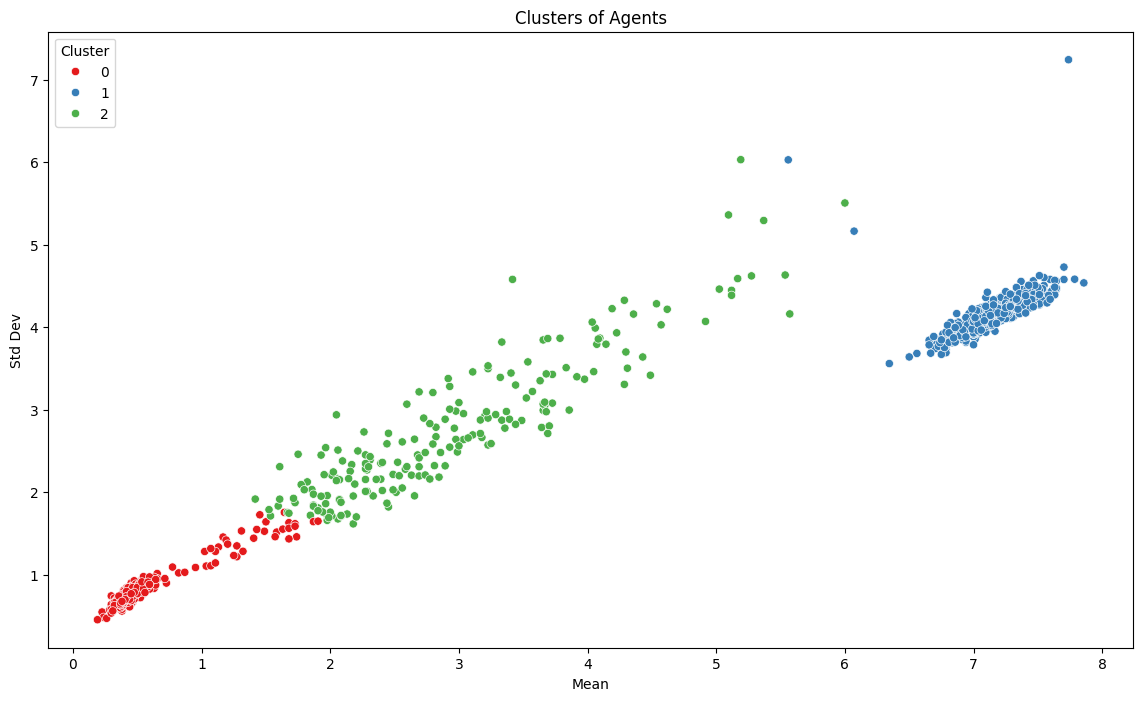

In [29]:
# Evaluate the quality of the clusters using silhouette score
silhouette_avg = silhouette_score(agent_stats_scaled, agent_stats['Cluster'])
print(f'Silhouette Score for 3 clusters: {silhouette_avg}')

# Visualize the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Mean', y='Std Dev', hue='Cluster', data=agent_stats, palette='Set1')
plt.title('Clusters of Agents')
plt.show()


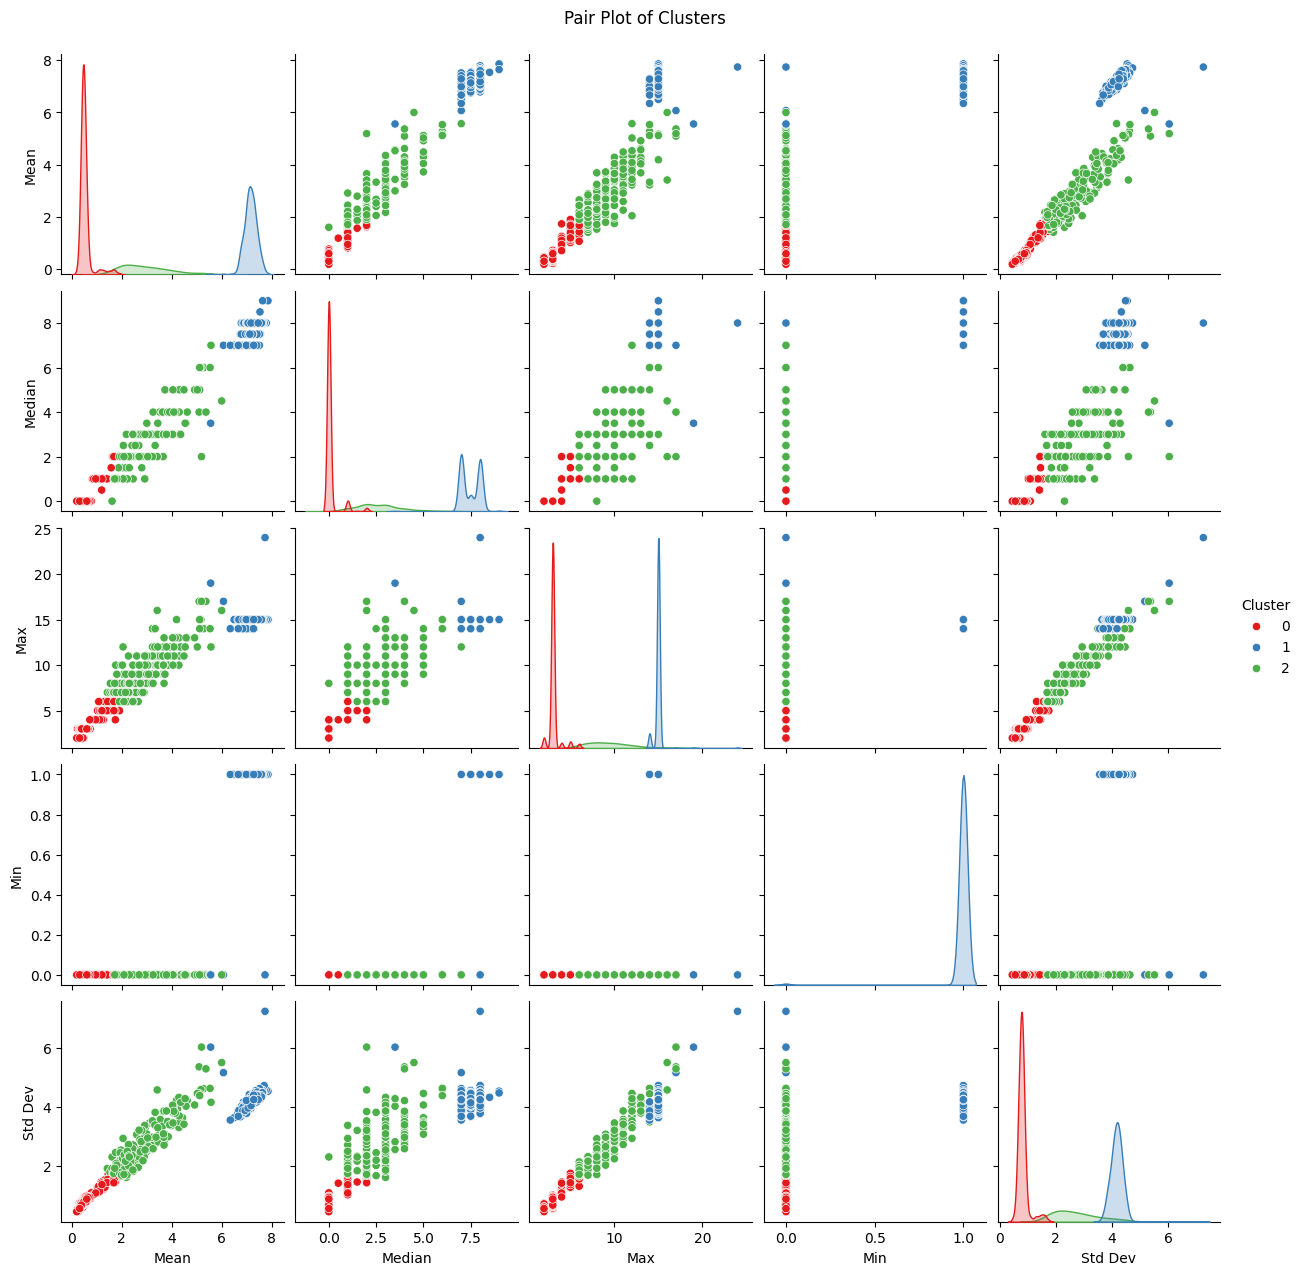

In [30]:
# Additional visualization with pair plots
sns.pairplot(agent_stats, hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()